<a href="https://colab.research.google.com/github/Geolist/first-repository/blob/main/1%EC%9E%A5_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

2.18.0
60000


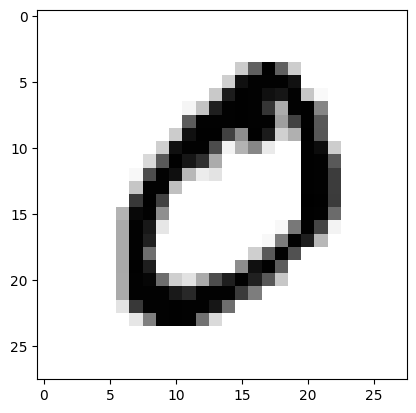

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
flat = x_train[1].flatten()  # 2D → 1D로 평탄화

# 한 줄에 28개씩 출력
for i in range(0, len(flat), 28):
    print(' '.join(f'{val:3}' for val in flat[i:i+28]))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0 

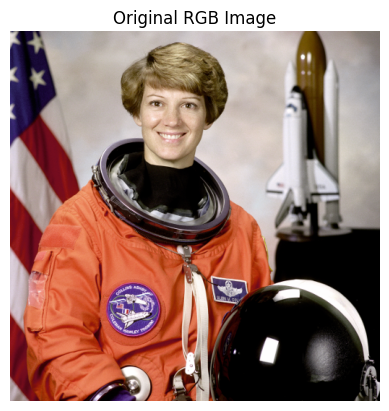

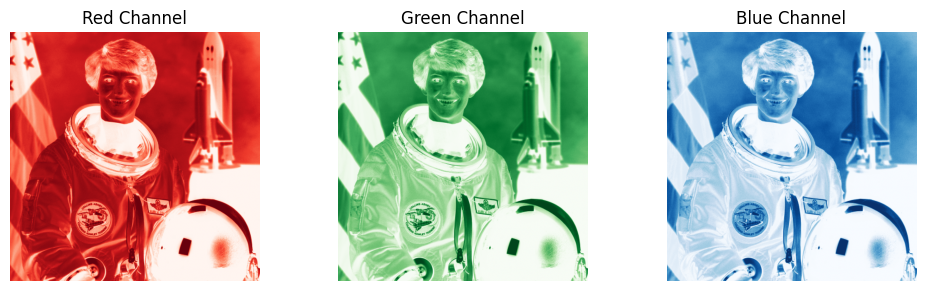

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# 예제 컬러 이미지: 'astronaut' (카메라맨은 흑백이라 RGB용으로 'astronaut' 사용)
img = data.astronaut()  # shape: (512, 512, 3)

# 채널 분리
r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

# 채널 텍스트 출력을 위한 함수
def print_channel(channel, name):
    output = []
    output.append(f'--- {name} Channel ---')
    for row in channel[:10]:  # 상위 10줄만 출력
        output.append(' '.join(f'{val:3}' for val in row[:32]))  # 각 줄 32개만
    return output

# 채널별 숫자 출력 결과 준비
r_output = print_channel(r_channel, 'Red')
g_output = print_channel(g_channel, 'Green')
b_output = print_channel(b_channel, 'Blue')

# plt.imshow(img, cmap=cmap)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

# 채널 시각화
plt.figure(figsize=(10, 3))
for i, (channel, cmap, title) in enumerate(zip(
    [r_channel, g_channel, b_channel],
    ['Reds', 'Greens', 'Blues'],
    ['Red', 'Green', 'Blue']
)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap=cmap)
    plt.title(f'{title} Channel')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
print(y_train[1])

0


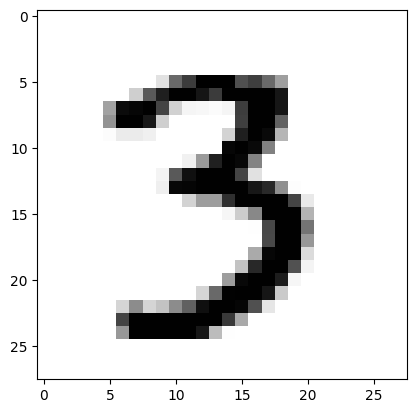

10001 번째 이미지의 숫자는 바로  3 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=1) # 여기서는 epochs를 한번 조정해주세요 여기서는 너무 길어서 1로 조정됨

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8682 - loss: 0.4323


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 3s - 9ms/step - accuracy: 0.9747 - loss: 0.0749
test_loss: 0.07493168115615845
test_accuracy: 0.9746999740600586


In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
model.predict() 결과 :  [3.2088852e-08 1.0910390e-09 1.0027427e-05 6.5174154e-06 1.3124533e-11
 1.4509813e-07 2.0403098e-12 9.9998063e-01 6.0188601e-09 2.5708418e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


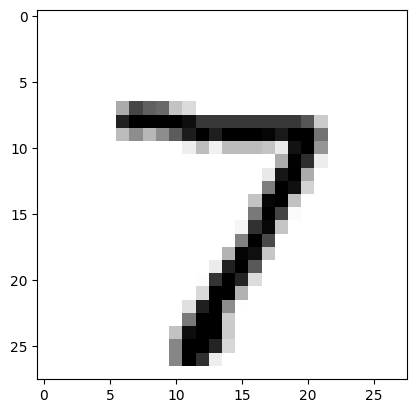

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.2790711e-05 8.3095051e-04 2.5487558e-05 2.9454036e-03 1.1624206e-01
 1.3708893e-03 1.5629043e-05 4.8748772e-03 1.5895475e-03 8.7209237e-01]
라벨: 4, 예측결과: 9


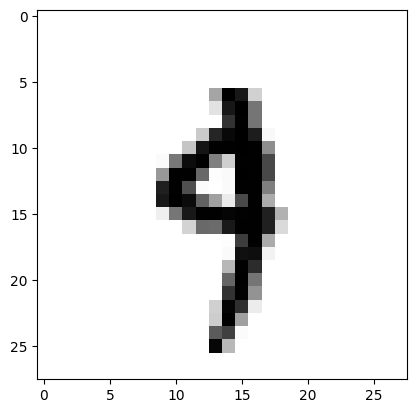

예측확률분포: [1.5180446e-05 7.5920332e-05 1.3661235e-05 2.3012744e-04 1.6079174e-01
 9.3566033e-04 6.8953348e-05 3.0345682e-03 4.6983614e-04 8.3436430e-01]
라벨: 4, 예측결과: 9


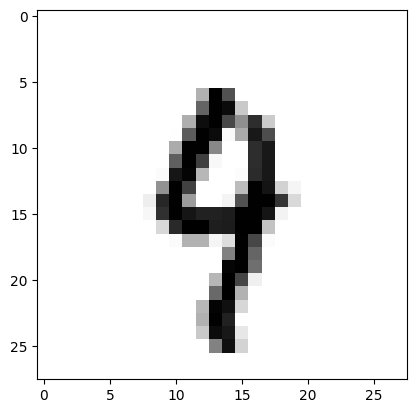

예측확률분포: [4.4668429e-02 1.9107847e-03 5.5070710e-04 3.1214175e-05 1.4927971e-05
 6.3569582e-01 2.6532465e-01 6.0649258e-05 5.1723626e-02 1.9135219e-05]
라벨: 6, 예측결과: 5


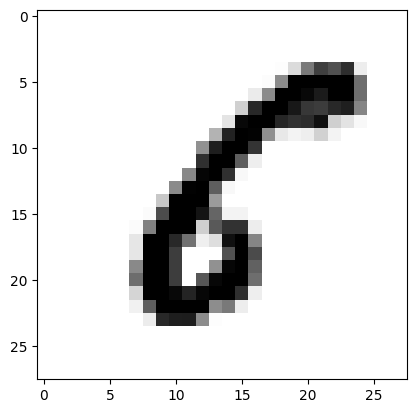

예측확률분포: [5.18830717e-02 1.07875067e-05 9.52604506e-03 6.09546223e-05
 3.23512912e-01 1.68350874e-04 6.14267230e-01 2.04449374e-04
 2.54522427e-04 1.11663474e-04]
라벨: 4, 예측결과: 6


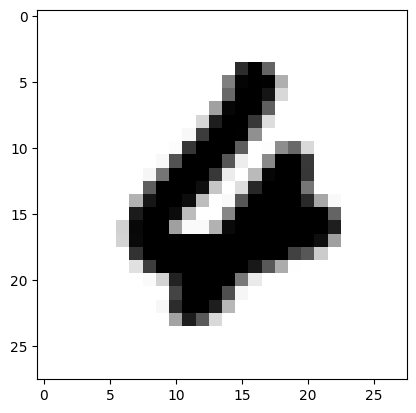

예측확률분포: [1.9070818e-01 2.5914548e-07 3.4609684e-01 4.4508880e-01 2.5424156e-03
 4.6236096e-03 8.2235429e-03 4.3334209e-04 1.9421433e-03 3.4085874e-04]
라벨: 2, 예측결과: 3


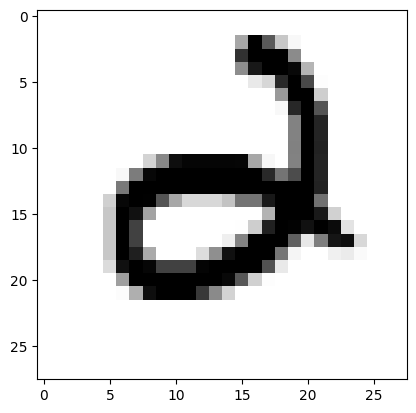

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=1  # 이부분이 학습을 몇바퀴 돌릴것인지를 결정함 여기서는 1만하고 진행해보겠습니다

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8575 - loss: 0.4736
313/313 - 3s - 9ms/step - accuracy: 0.9784 - loss: 0.0688
test_loss: 0.06875592470169067 
test_accuracy: 0.9783999919891357


# 프로젝트

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.18.0
2.0.2


In [ ]:
## 압축 해제 코드 -
# 만든 데이터를 Colab에 올려주세요
# 압축파일 이름을 맞춰주세요~

!unzip 가위-samples.zip -d 가위
!unzip 바위-samples.zip -d 바위
!unzip 보-samples.zip   -d 보

Archive:  가위-samples.zip
replace 가위/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: 가위/0.jpg            
 extracting: 가위/1.jpg            
 extracting: 가위/2.jpg            
 extracting: 가위/3.jpg            
 extracting: 가위/4.jpg            
 extracting: 가위/5.jpg            
 extracting: 가위/6.jpg            
 extracting: 가위/7.jpg            
 extracting: 가위/8.jpg            
 extracting: 가위/9.jpg            
 extracting: 가위/10.jpg           
 extracting: 가위/11.jpg           
 extracting: 가위/12.jpg           
 extracting: 가위/13.jpg           
 extracting: 가위/14.jpg           
 extracting: 가위/15.jpg           
 extracting: 가위/16.jpg           
 extracting: 가위/17.jpg           
 extracting: 가위/18.jpg           
 extracting: 가위/19.jpg           
 extracting: 가위/20.jpg           
 extracting: 가위/21.jpg           
 extracting: 가위/22.jpg           
 extracting: 가위/23.jpg           
 extracting: 가위/24.jpg           
 extracting: 가위/25.jpg           
 extracting: 가위/26.jpg           

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
## 여기서 사용된 코드가 업데이트 된 부분이있습니다

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./가위"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

165  images to be resized.
165  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "./바위"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "./보"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

133  images to be resized.
133  images resized.
바위 이미지 resize 완료!
170  images to be resized.
170  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np

# 셔플 함수를 넣어봤습니다
from sklearn.utils import shuffle

# 저희가 만든 데이터는 개수가 300개가 아닐수있습니다
# 아래 함수의 인자가 조금 바뀐것에 주의하세요


def load_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위/*.jpg') + \
                 glob.glob(f'./바위/*.jpg') + \
                 glob.glob(f'./보/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 468 입니다.
x_train shape: (468, 28, 28, 3)
y_train shape: (468,)


라벨:  0


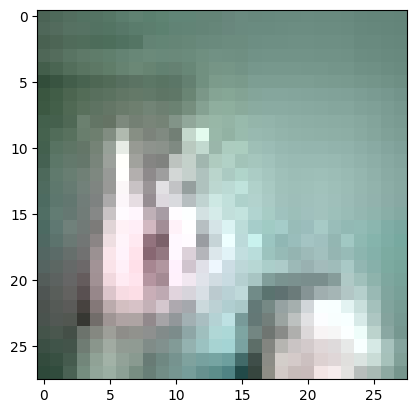

In [ ]:
## 사진 화질이 말도안되는데...? 이걸 알아맞춘다고...?

import matplotlib.pyplot as plt

plt.imshow(x_train[224])
print('라벨: ', y_train[224])

In [ ]:
# ## ! LMS에서도 이거 추가해줘야합니다
from tensorflow import keras

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 왜 정확도가 100퍼센트가 나올까?

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3665 - loss: 25.3941
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7492 - loss: 0.9181
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9029 - loss: 0.4030
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9438 - loss: 0.2951
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9564 - loss: 0.1709
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9745 - loss: 0.1084
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9762 - loss: 0.0775
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9756 - loss: 0.0784
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9871 - loss: 0.0397
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9800 - loss: 0.0491


In [ ]:
## 압축 해제 코드 -
# 만든 데이터를 Colab에 올려주세요
# 압축파일 이름을 맞춰주세요~

!unzip 가위1_test-samples.zip -d 가위1_test
!unzip 바위1_test-samples.zip -d 바위1_test
!unzip 보1_test-samples.zip   -d 보1_test

unzip:  cannot find or open 가위1_test-samples.zip, 가위1_test-samples.zip.zip or 가위1_test-samples.zip.ZIP.
unzip:  cannot find or open 바위1_test-samples.zip, 바위1_test-samples.zip.zip or 바위1_test-samples.zip.ZIP.
unzip:  cannot find or open 보1_test-samples.zip, 보1_test-samples.zip.zip or 보1_test-samples.zip.ZIP.


In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "/가위_test"
resize_images(image_dir_path)

image_dir_path = "/바위_test"
resize_images(image_dir_path)

image_dir_path = "/보_test"
resize_images(image_dir_path)

image_dir_path = "."
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
학습데이터(x_train)의 이미지 개수는 468 입니다.
x_test shape: (468, 28, 28, 3)
y_test shape: (468,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

15/15 - 0s - 21ms/step - accuracy: 0.9872 - loss: 0.0269
test_loss: 0.026880964636802673 
test_accuracy: 0.9871794581413269


In [ ]:
y_train

array([0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0,
       2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2,
       2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,